<a href="https://colab.research.google.com/github/luisrayas2000/Data-Analysis/blob/main/Proyecto_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto de Clustering


Importat librerías

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_country=pd.read_csv('/content/Country-data.csv')

In [60]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Manejo de valores nulos

In [61]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [62]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [63]:
int_cols=df_country.select_dtypes(exclude='object').columns

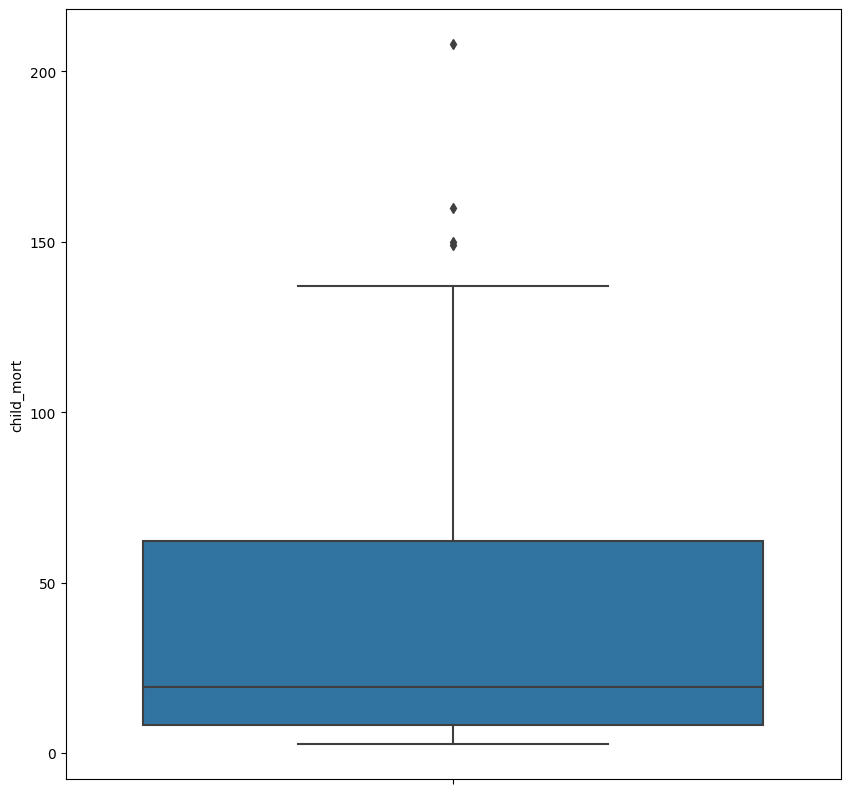

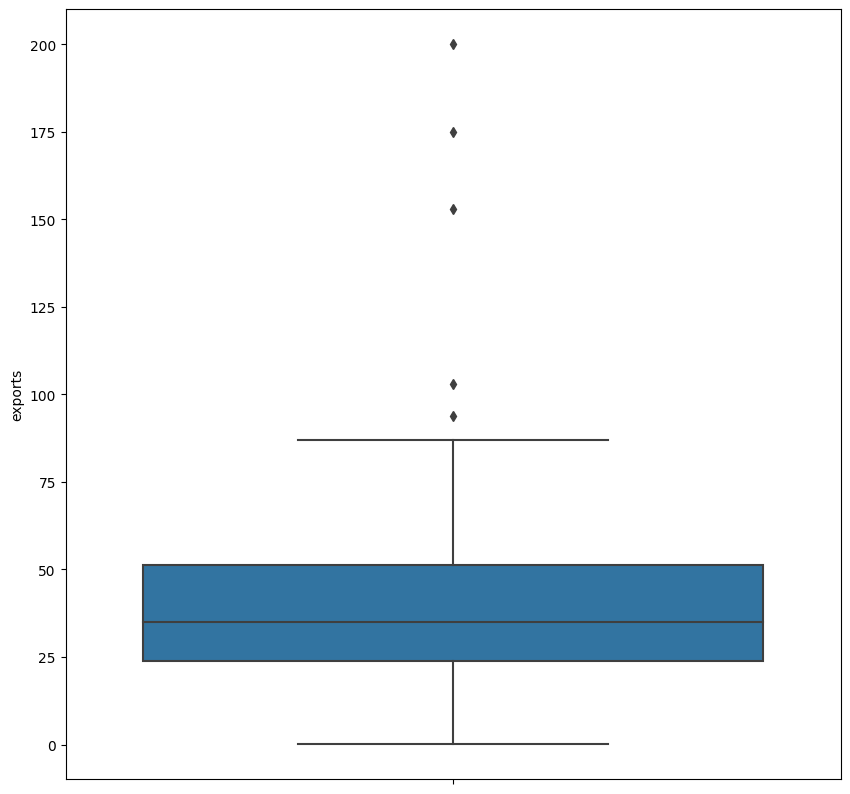

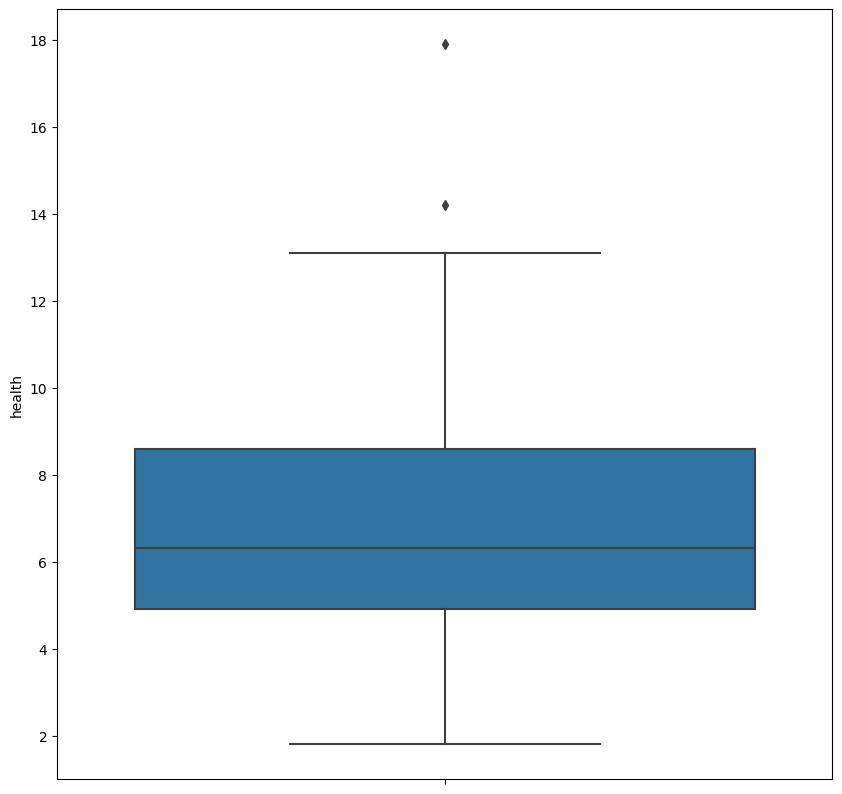

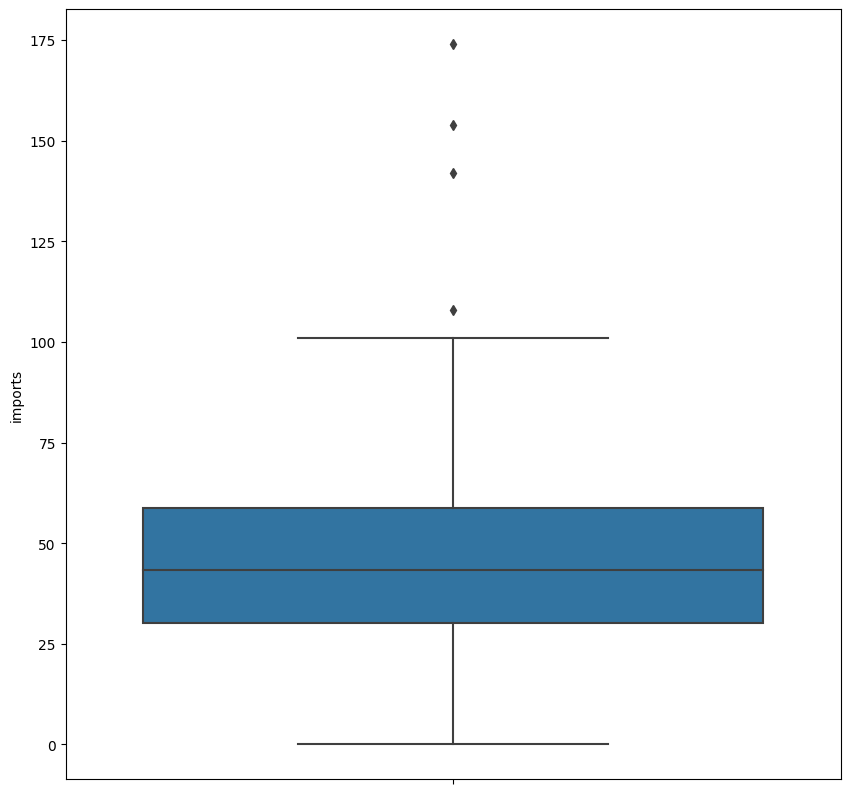

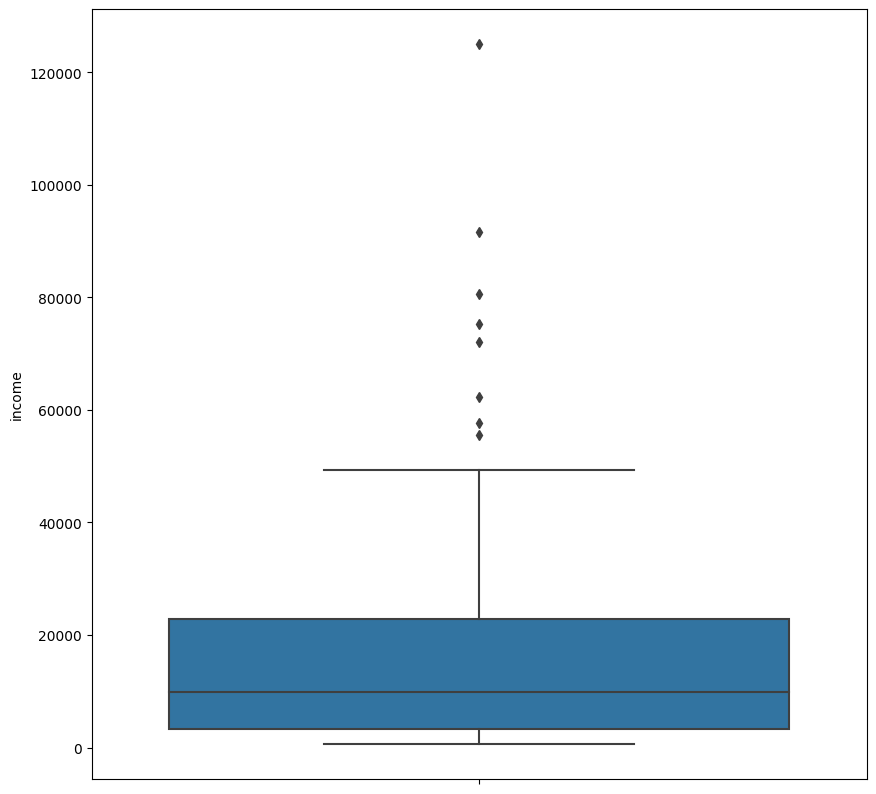

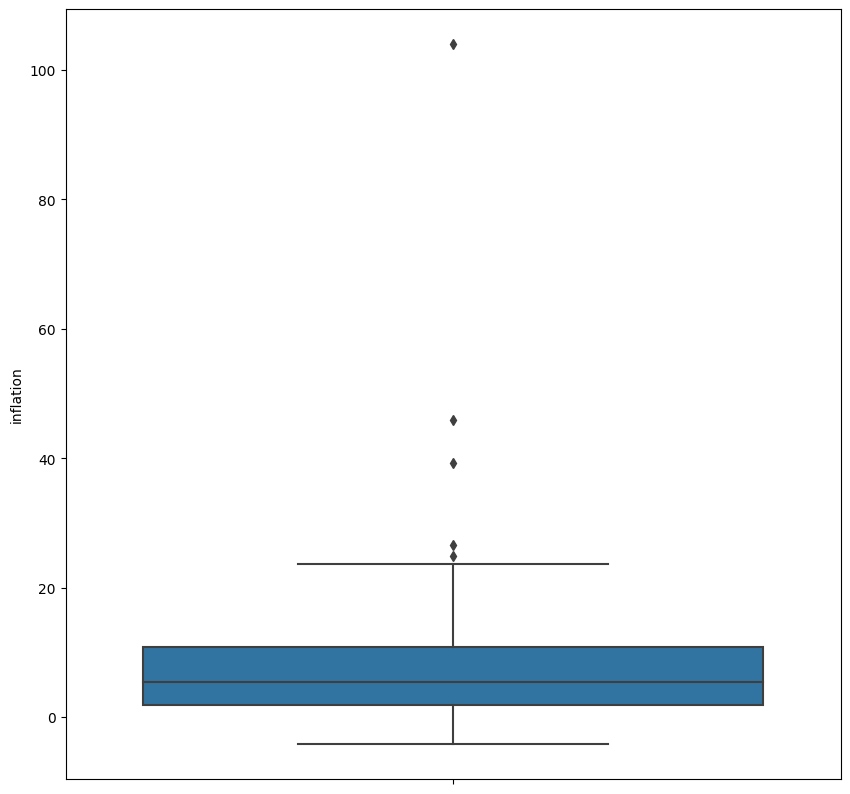

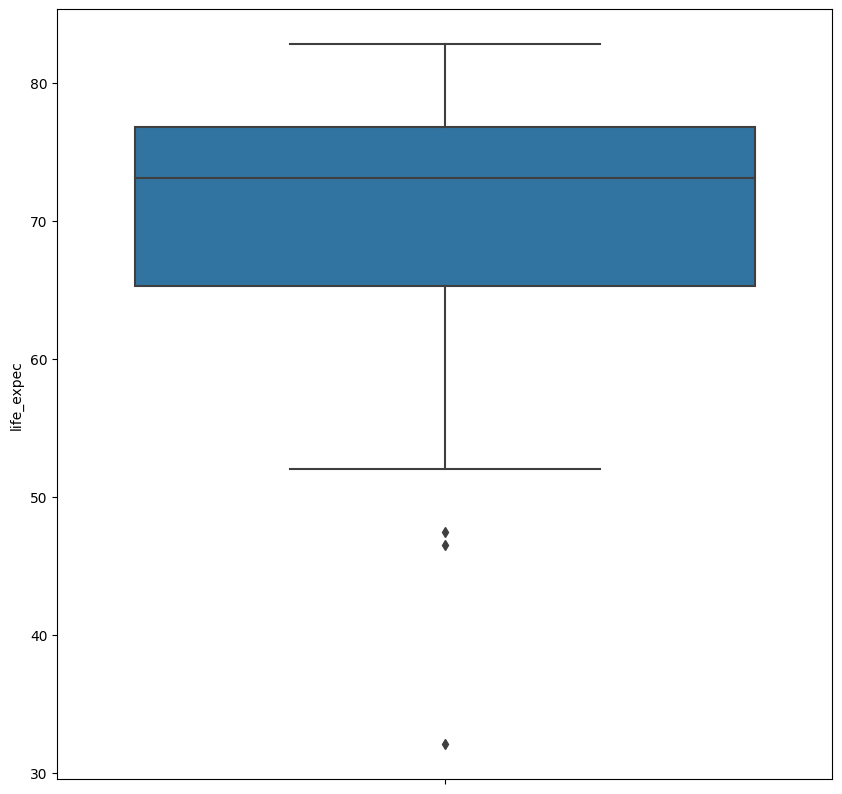

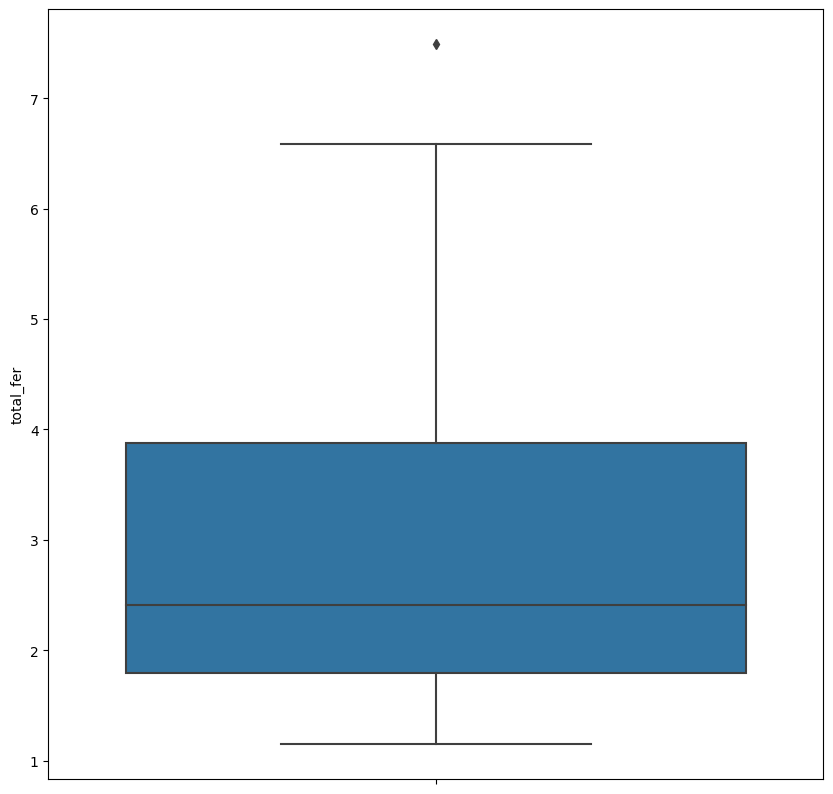

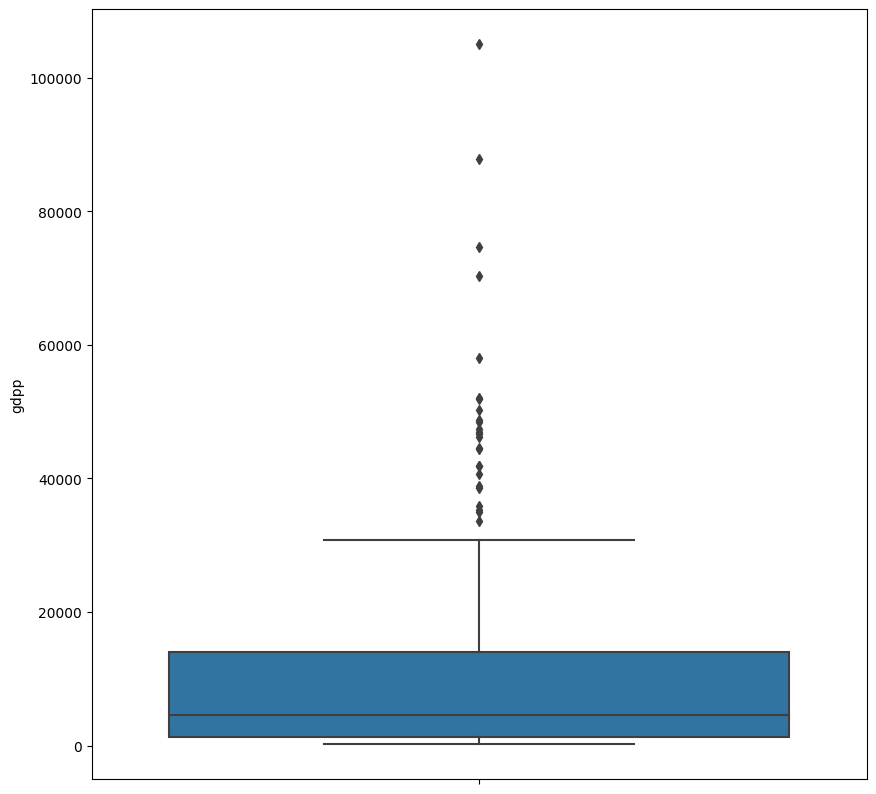

In [64]:
int_cols
for _ in int_cols:
  plt.figure(figsize=(10,10))
  sns.boxplot(data=df_country,y= _)

<ipython-input-65-6bd8592de345>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_country.corr(),annot=True,cmap='coolwarm')


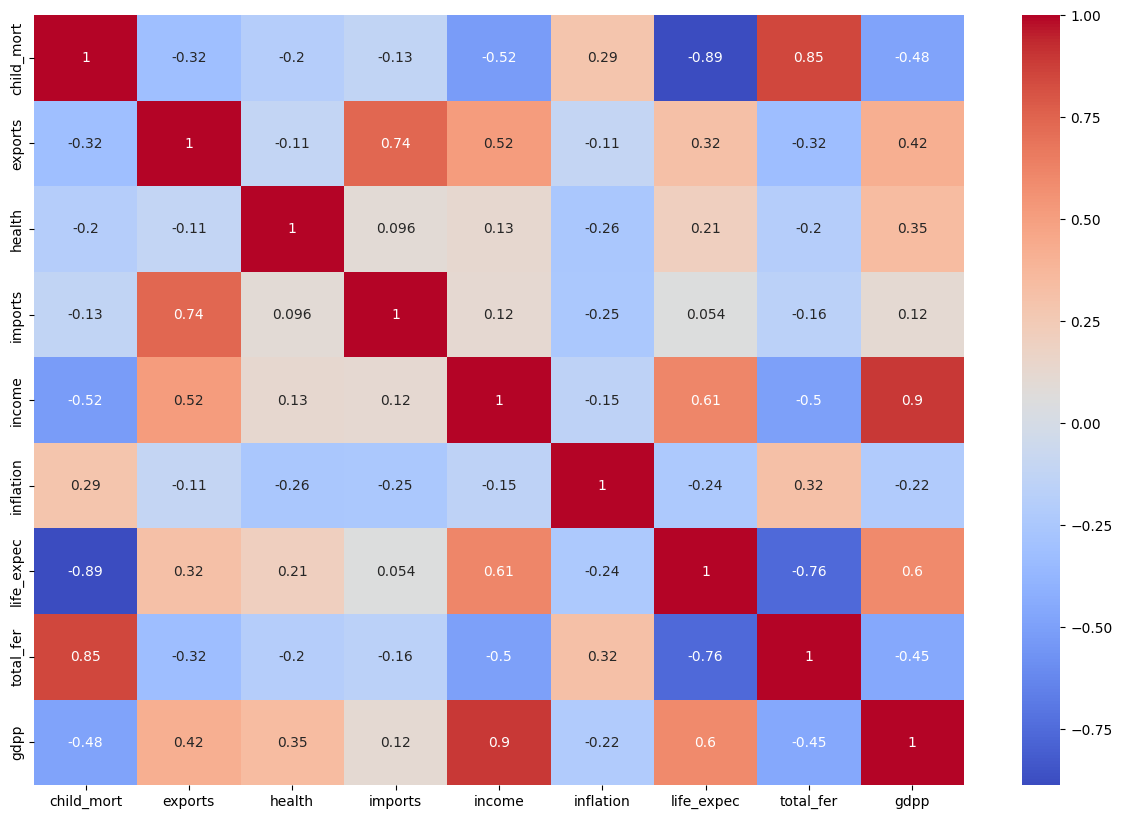

In [65]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df_country.corr(),annot=True,cmap='coolwarm')
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
scaaler=StandardScaler()
df_country_scaled=scaaler.fit_transform(df_country.drop('country',axis=1))

In [67]:
df_country_scaled=pd.DataFrame(df_country_scaled,columns=df_country.drop('country',axis=1).columns)

In [68]:
df_country_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


Aplicando PCA

In [69]:
from sklearn.decomposition import PCA


In [70]:
pca=PCA()
pca.fit(df_country_scaled)
pca_data_scaled=pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [71]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


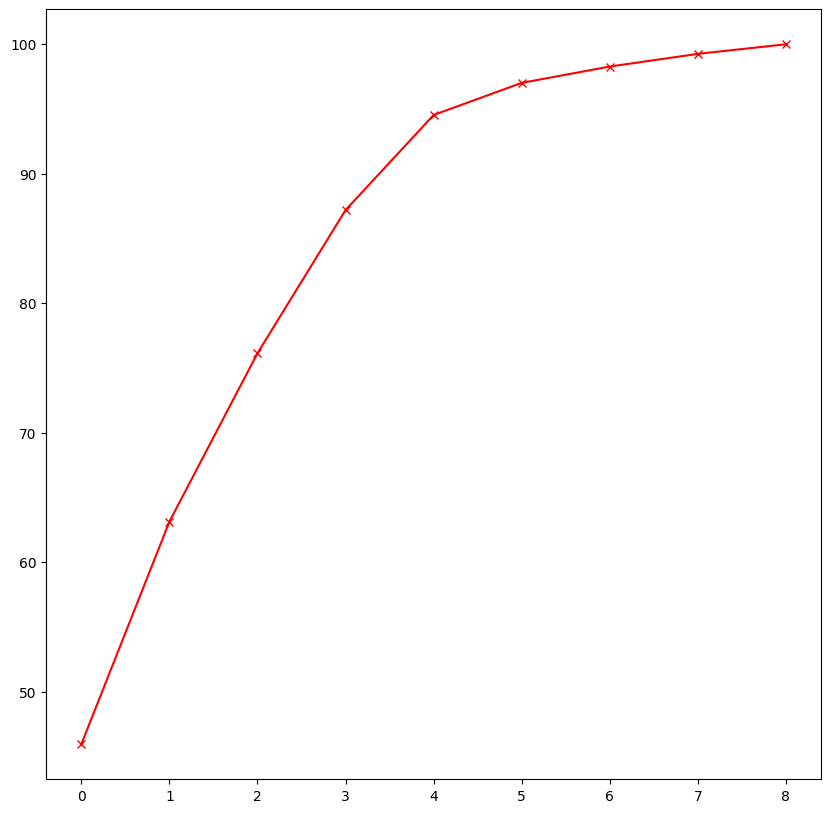

In [72]:
cum_var=np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

In [73]:
pca_data_standard=pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)

In [74]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


##Resolviendo por Kmeans

In [75]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    cluster_labels= km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

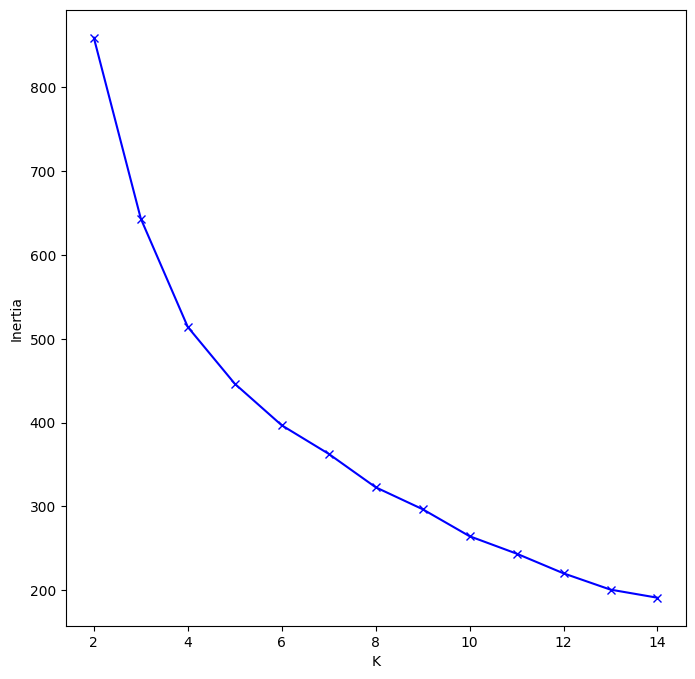

In [77]:
fig=plt.figure(figsize=(8,8,))
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

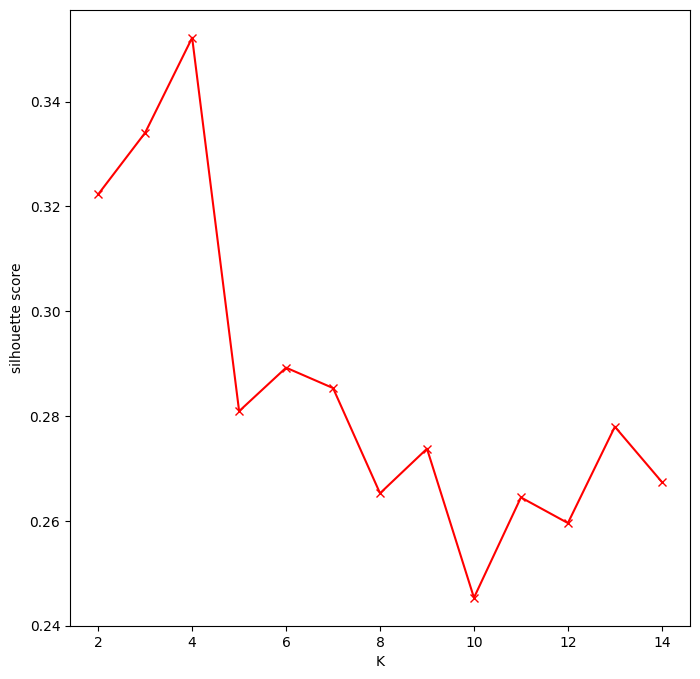

In [78]:
fig=plt.figure(figsize=(8,8,))
plt.plot(K,silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [79]:
km = KMeans(n_clusters = 4)
y= km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_country['k_means_pca']=y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.35491314499063326


##Sin PCA

In [80]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    cluster_labels= km.fit_predict(df_country_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_country_scaled,cluster_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

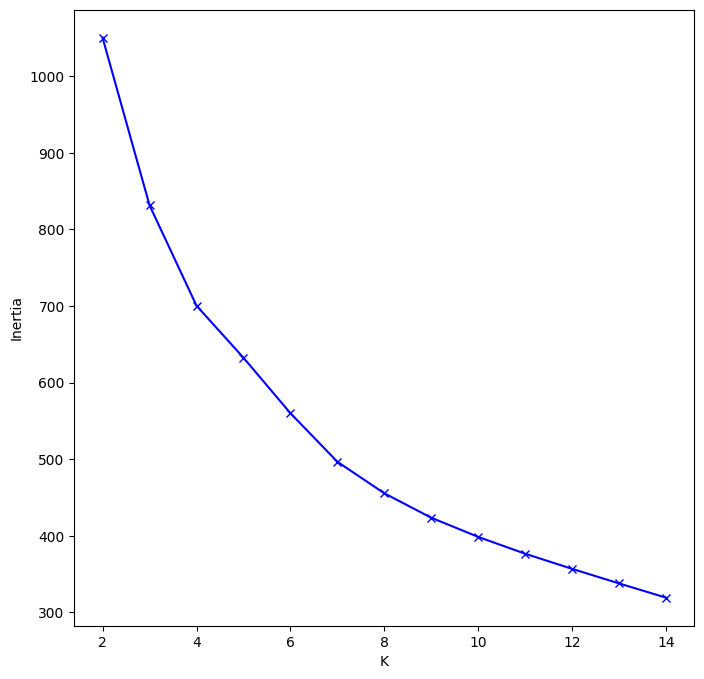

In [81]:
fig=plt.figure(figsize=(8,8,))
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

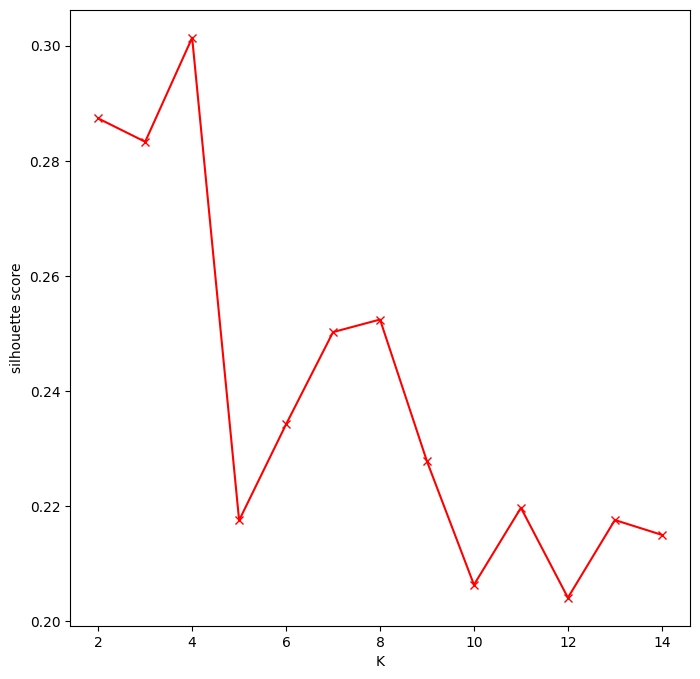

In [82]:
fig=plt.figure(figsize=(8,8,))
plt.plot(K,silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [83]:
km = KMeans(n_clusters = 5)
y= km.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y))
df_country['k_means']=y

0.30475221266676467


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Aglomerativen hierachical clustering


##PCA

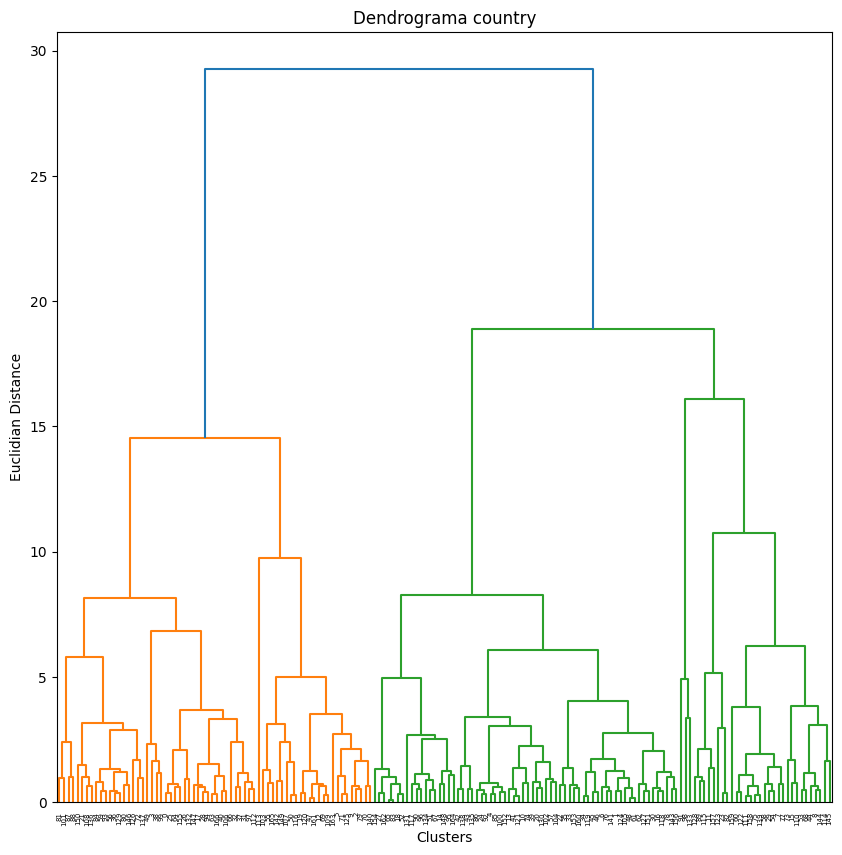

In [84]:
fig=plt.figure(figsize=(10,10))
dendrogram_plot=dendrogram(linkage(pca_data_standard,method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [85]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##Sin PCA

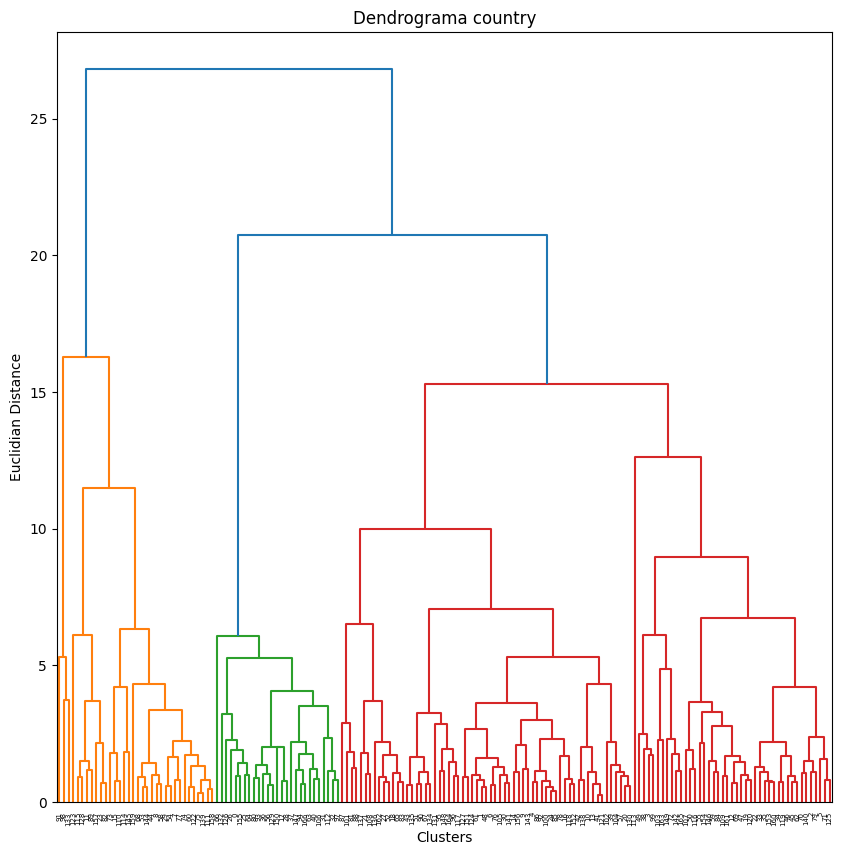

In [86]:
fig=plt.figure(figsize=(10,10))
dendrogram_plot=dendrogram(linkage(df_country_scaled,method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [87]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_hc))
df_country['hc'] = y_hc

0.3153134331018189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


###DBSCAN

##PCA

In [88]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

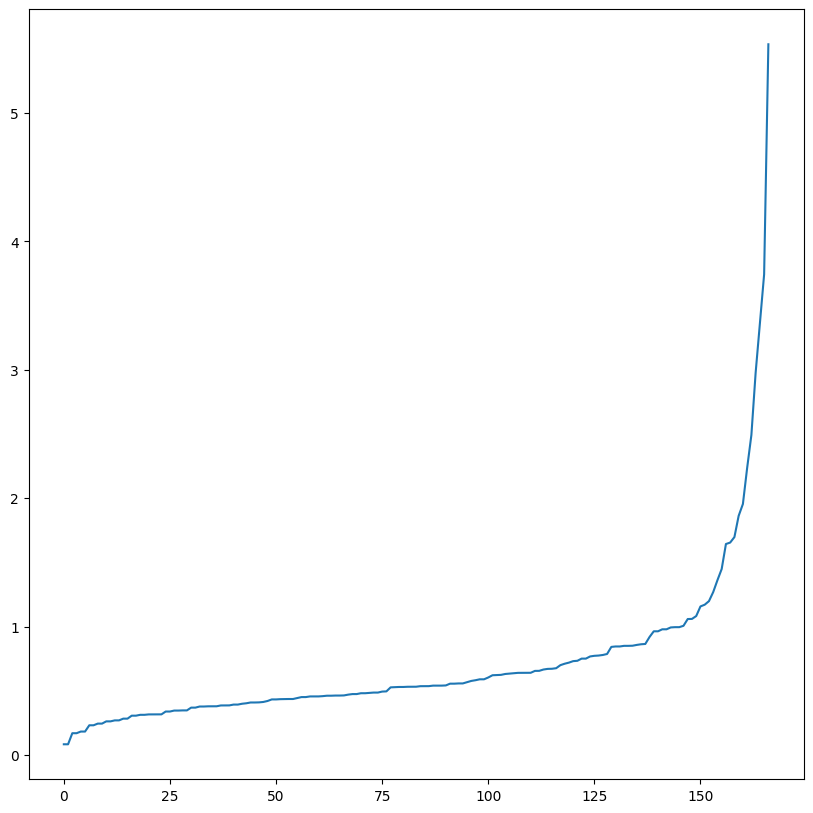

In [89]:
distances = np.sort(distances, axis=0)
distances=distances[:,1]
fig=plt.figure(figsize=(10,10))
plt.plot(distances)

In [90]:
eps_values=np.arange(0.5,2.0,0.10)
min_samples=np.arange(3,12)

In [91]:
from itertools import product
dbscan_paramns= list(product(eps_values,min_samples))
no_of_clusters=[]
sil_score=[]
for p in dbscan_paramns:
  y_dbscan=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(pca_data_standard)
  try:
    sil_score.append(silhouette_score(pca_data_standard,y_dbscan))
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [92]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns,columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score']=sil_score
df_param_tunning['n_clusters']=no_of_clusters

In [93]:
pivot_1=pd.pivot_table(df_param_tunning, values='sil_score',columns='Eps',index='Min_samples')
pivot_2=pd.pivot_table(df_param_tunning, values='n_clusters',columns='Eps',index='Min_samples')

<Axes: xlabel='Eps', ylabel='Min_samples'>

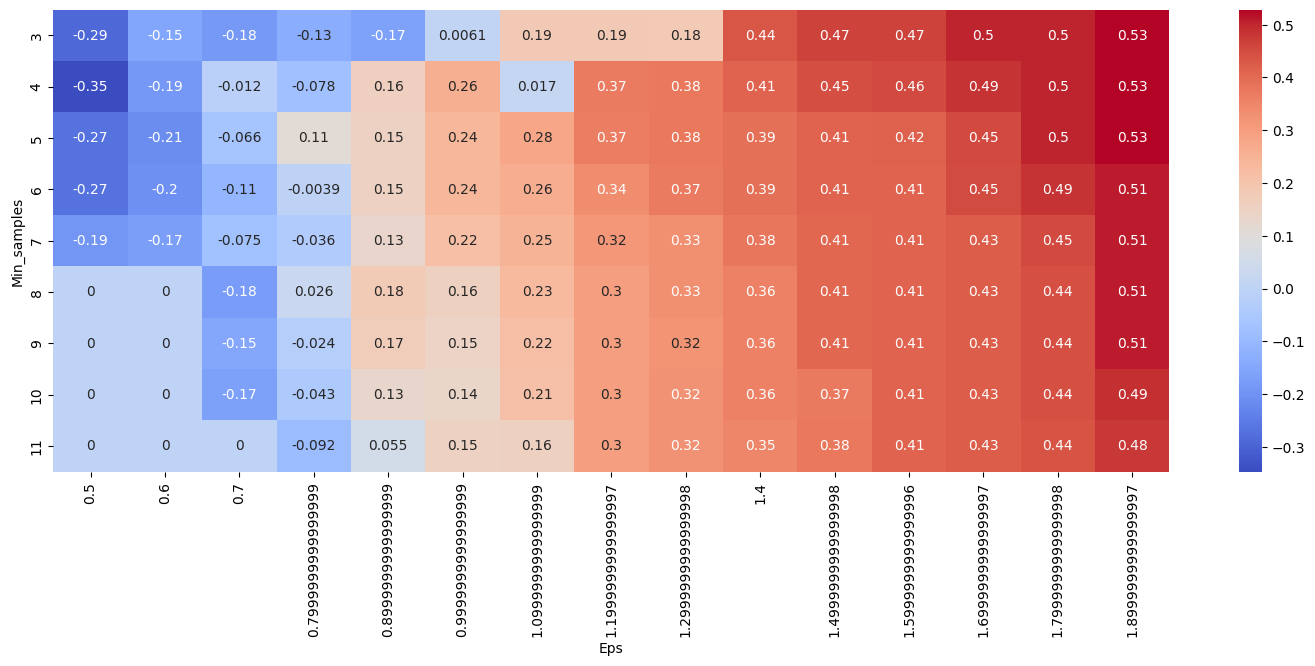

In [94]:
fig,ax=plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)

<Axes: xlabel='Eps', ylabel='Min_samples'>

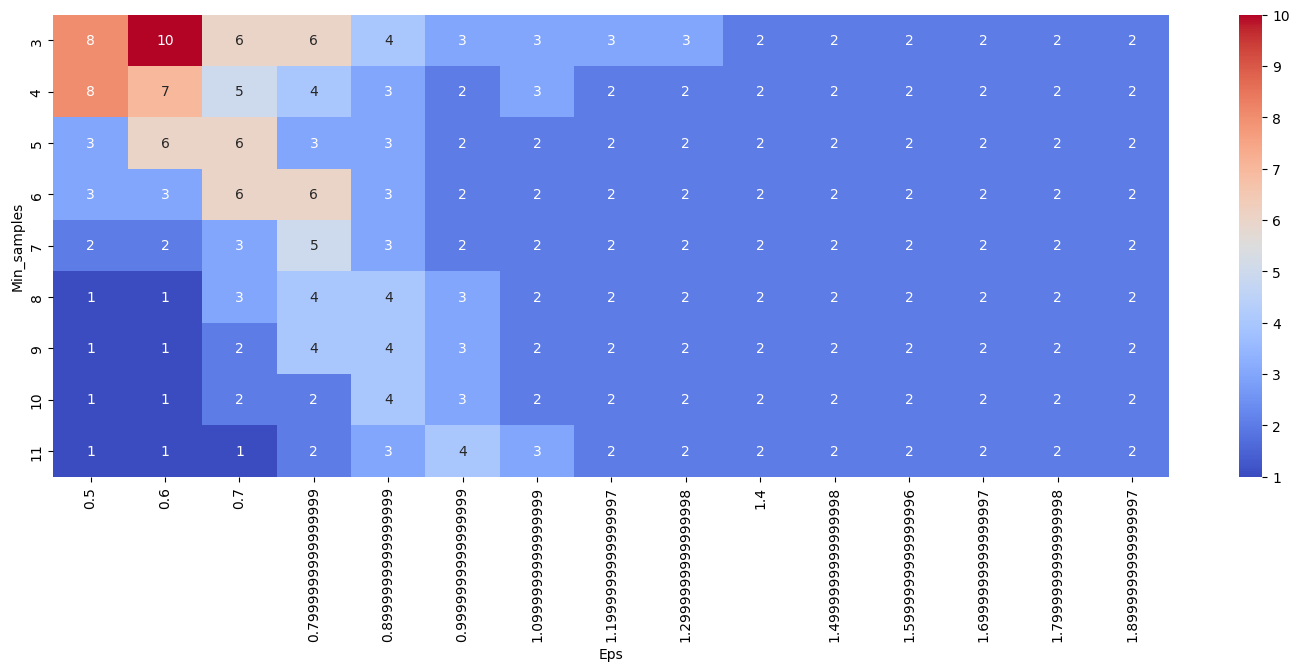

In [95]:
fig,ax=plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)

In [96]:
dbscan_train=DBSCAN(eps=1.2,min_samples=3)
y_dbscan=dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(df_country_scaled,y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.2027239878581996


###Sin PCA


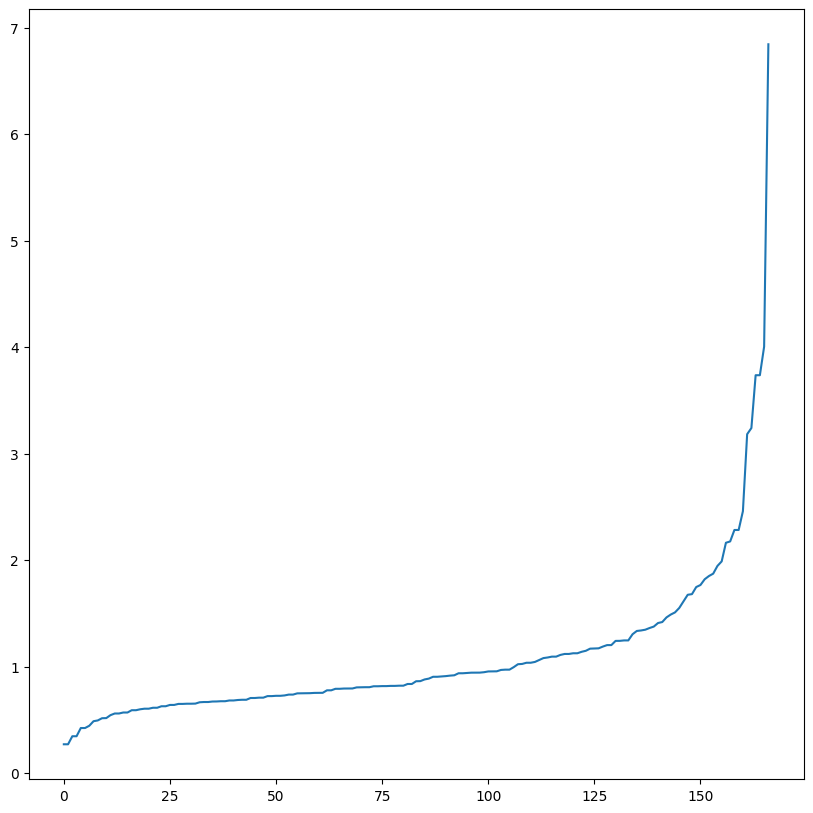

In [97]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances=distances[:,1]
fig=plt.figure(figsize=(10,10))
plt.plot(distances)

In [98]:
eps_values=np.arange(1,3.0,0.10)
min_samples=np.arange(3,12)

In [99]:
from itertools import product
dbscan_paramns= list(product(eps_values,min_samples))
no_of_clusters=[]
sil_score=[]
for p in dbscan_paramns:
  y_dbscan=DBSCAN(eps=p[0],min_samples=p[1]).fit_predict(df_country_scaled)
  try:
    sil_score.append(silhouette_score(df_country_scaled,y_dbscan))
  except:
    sil_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [100]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns,columns=['Eps', 'Min_samples'])
df_param_tunning['sil_score']=sil_score
df_param_tunning['n_clusters']=no_of_clusters

In [101]:
pivot_1=pd.pivot_table(df_param_tunning, values='sil_score',columns='Eps',index='Min_samples')
pivot_2=pd.pivot_table(df_param_tunning, values='n_clusters',columns='Eps',index='Min_samples')

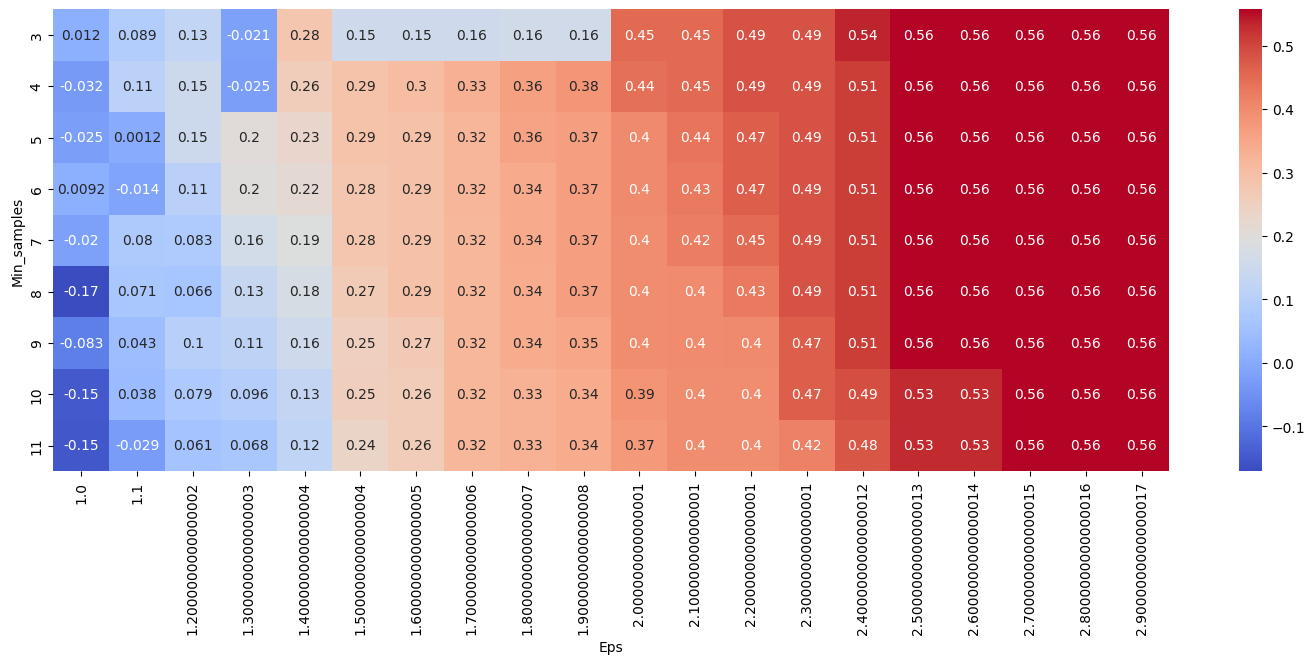

In [102]:
fig,ax=plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

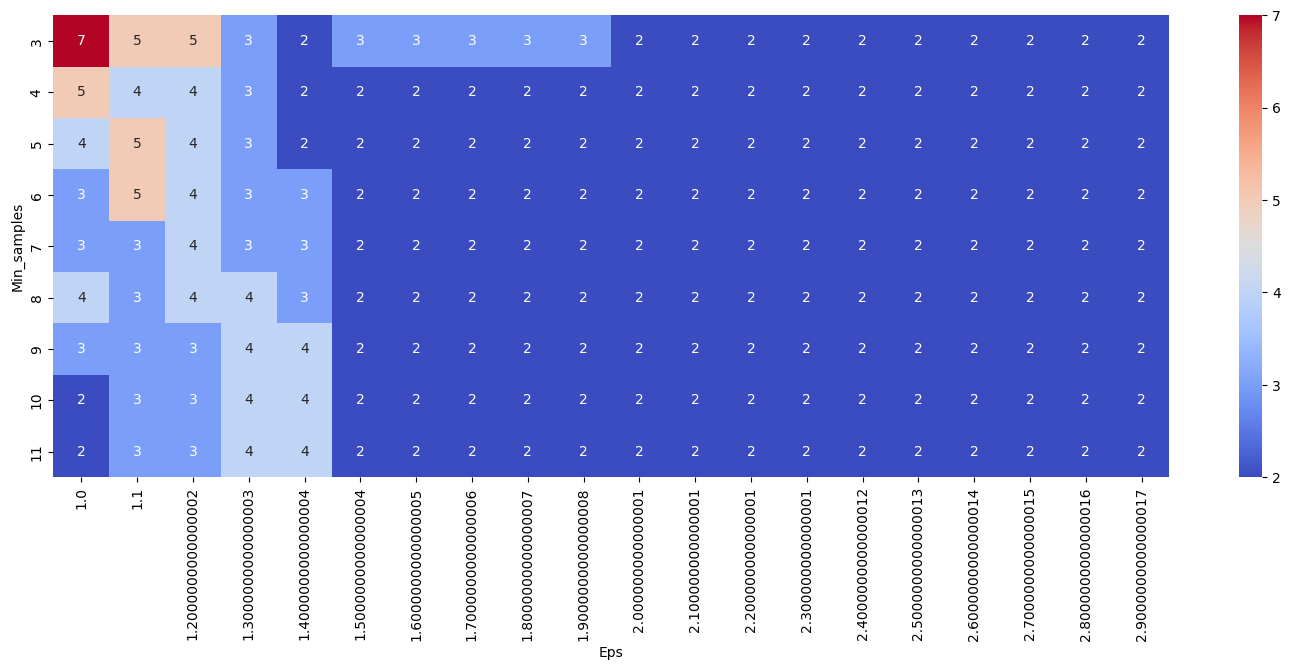

In [103]:
fig,ax=plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

In [104]:
dbscan_train=DBSCAN(eps=1.7,min_samples=3)
y_dbscan=dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled,y_dbscan))
df_country['dbscan_cluster'] = y_dbscan

0.1563549566374231


In [105]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,1,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,0,0,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,1,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2,0,0,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2,2,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2,0,0,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,1,1,0,0,0


## Evaluación de resultados

In [107]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan_pca', 'dbscan_cluster'],
      dtype='object')

In [ ]:
df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']]

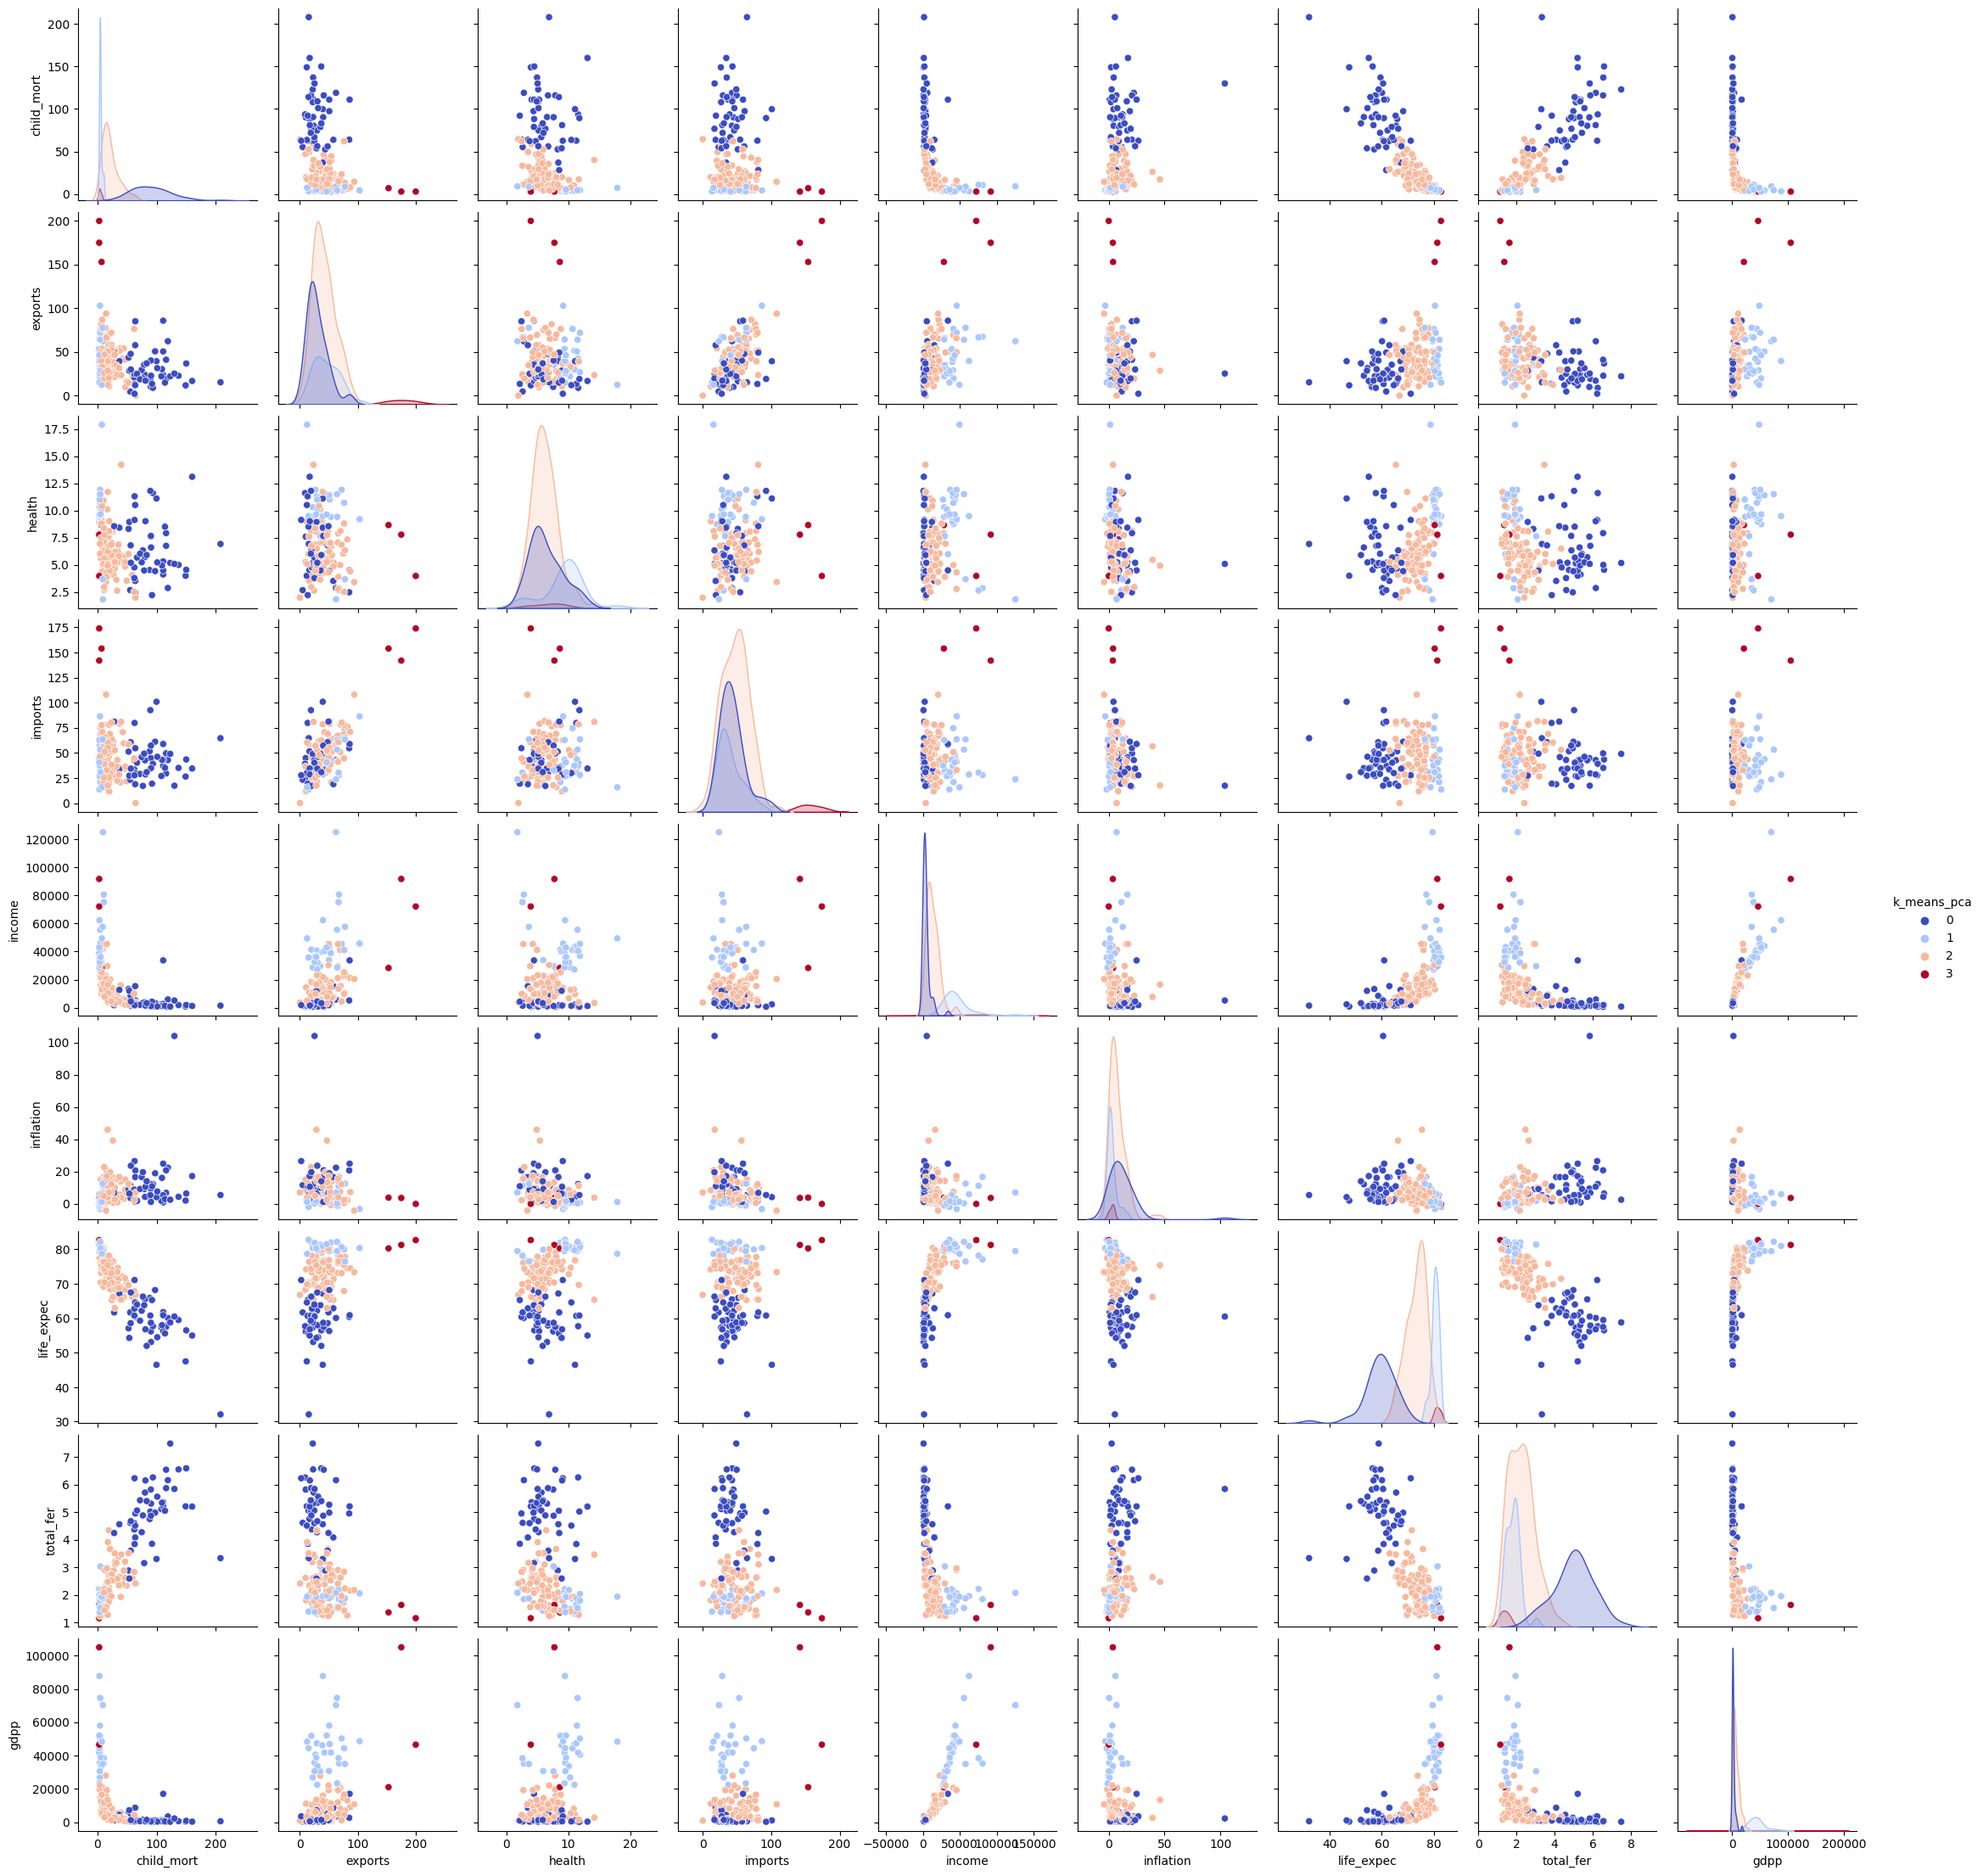

In [110]:
sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']],hue='k_means_pca',palette='coolwarm')

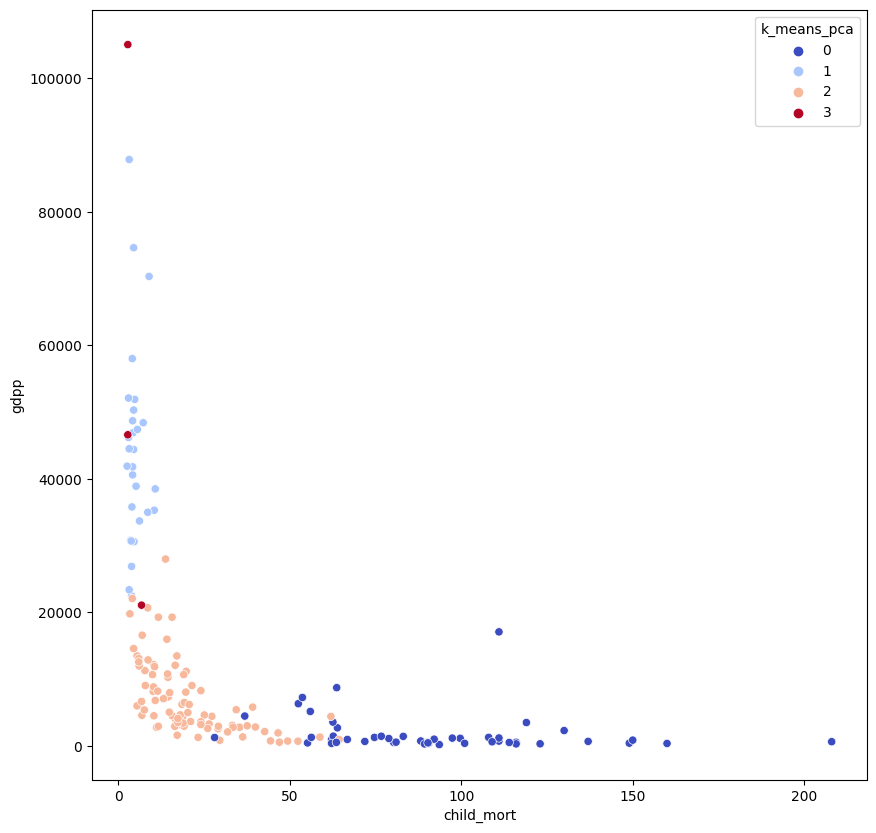

In [111]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country,x='child_mort', y='gdpp',hue='k_means_pca', palette='coolwarm')
plt.show()

In [116]:
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan_pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3,3,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3,3,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3,3,0,1,-1,-1
